In [2]:
import numpy as np
import re

num_gws_values = [1, 2, 3, 4, 5]

# Function to extract data from files
def extract_data(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()

    avg_latency_values = []
    throughput_values = []
    p99_latency_values = []

    for line in lines:
        avg_latency_match = re.search(r'Average Latency: ([\d\.]+)', line)
        throughput_match = re.search(r'Throughput: ([\d\.]+)', line)
        p99_latency_match = re.search(r'P99 Latency: ([\d\.]+)', line)

        if avg_latency_match:
            avg_latency_values.append(float(avg_latency_match.group(1)))
        if throughput_match:
            throughput_values.append(float(throughput_match.group(1)))
        if p99_latency_match:
            p99_latency_values.append(float(p99_latency_match.group(1)))

    return avg_latency_values, throughput_values, p99_latency_values

# Lists to store means for put and get metrics
put_avg_latency_means = []
put_throughput_means = []
put_p99_latency_means = []

get_avg_latency_means = []
get_throughput_means = []
get_p99_latency_means = []

for num_gws in num_gws_values:
    # Read data from put file
    put_file_path = "put_metrics_" + str(num_gws) + "_gws.txt"
    put_avg_latency, put_throughput, put_p99_latency = extract_data(put_file_path)

    # Calculate means for put metrics
    put_avg_latency_means.append(np.mean(put_avg_latency))
    put_throughput_means.append(np.mean(put_throughput))
    put_p99_latency_means.append(np.mean(put_p99_latency))

    # Read data from get file
    get_file_path = "get_metrics_" + str(num_gws) + "_gws.txt"
    get_avg_latency, get_throughput, get_p99_latency = extract_data(get_file_path)

    # Calculate means for get metrics
    get_avg_latency_means.append(np.mean(get_avg_latency))
    get_throughput_means.append(np.mean(get_throughput))
    get_p99_latency_means.append(np.mean(get_p99_latency))

# Print means for each number of gateways for put metrics
print("PUT Metrics:")
for i, num_gws in enumerate(num_gws_values):
    print(f"Number of Gateways: {num_gws}")
    print(f"Average Latency Mean: {put_avg_latency_means[i]} ms")
    print(f"Throughput Mean: {put_throughput_means[i]} requests/second")
    print(f"P99 Latency Mean: {put_p99_latency_means[i]} ms")
    print()

# Print means for each number of gateways for get metrics
print("GET Metrics:")
for i, num_gws in enumerate(num_gws_values):
    print(f"Number of Gateways: {num_gws}")
    print(f"Average Latency Mean: {get_avg_latency_means[i]} ms")
    print(f"Throughput Mean: {get_throughput_means[i]} requests/second")
    print(f"P99 Latency Mean: {get_p99_latency_means[i]} ms")
    print()


PUT Metrics:
Number of Gateways: 1
Average Latency Mean: 1.3876800000000002 ms
Throughput Mean: 721.7906666666668 requests/second
P99 Latency Mean: 2.1666666666666665 ms

Number of Gateways: 2
Average Latency Mean: 1.669564 ms
Throughput Mean: 606.2940000000001 requests/second
P99 Latency Mean: 3.6 ms

Number of Gateways: 3
Average Latency Mean: 2.028985 ms
Throughput Mean: 493.8706666666667 requests/second
P99 Latency Mean: 5.0 ms

Number of Gateways: 4
Average Latency Mean: 2.465218 ms
Throughput Mean: 406.08259999999996 requests/second
P99 Latency Mean: 5.4 ms

Number of Gateways: 5
Average Latency Mean: 3.156038 ms
Throughput Mean: 318.1146 requests/second
P99 Latency Mean: 10.2 ms

GET Metrics:
Number of Gateways: 1
Average Latency Mean: 1.38889 ms
Throughput Mean: 721.1435 requests/second
P99 Latency Mean: 3.1666666666666665 ms

Number of Gateways: 2
Average Latency Mean: 1.770372 ms
Throughput Mean: 577.0433999999999 requests/second
P99 Latency Mean: 5.8 ms

Number of Gateways: 

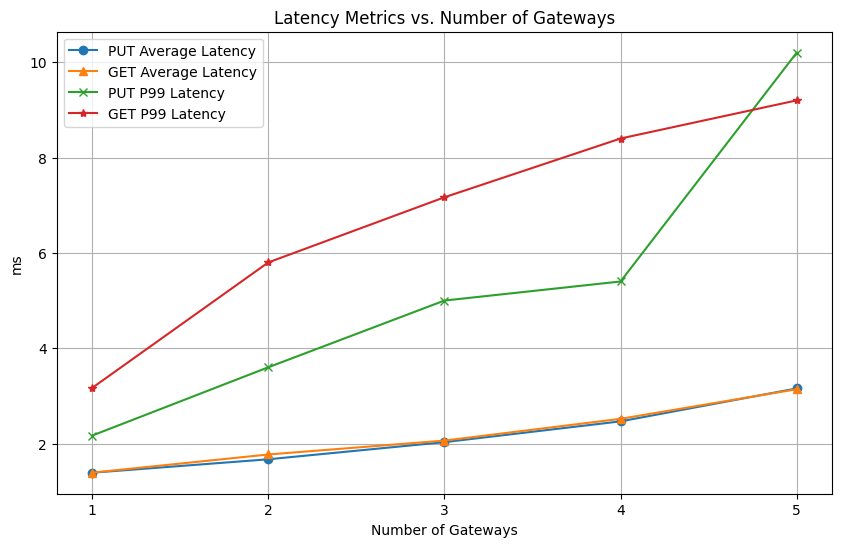

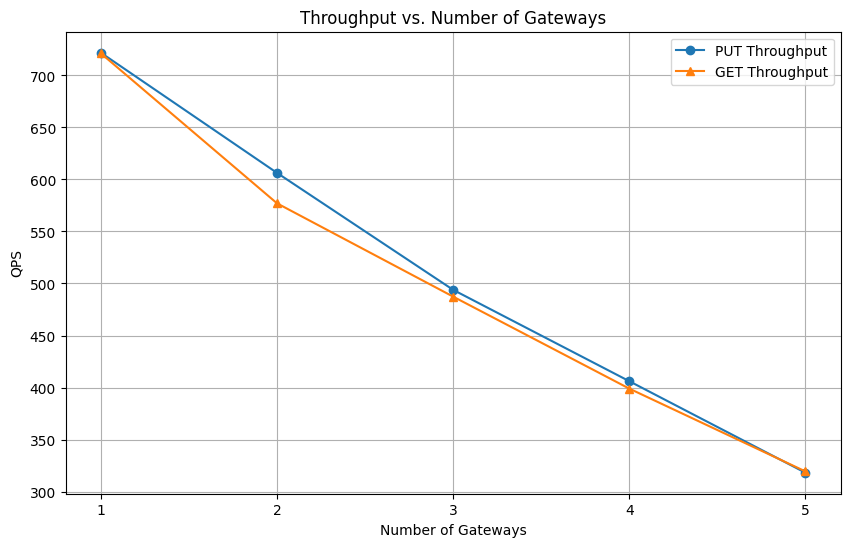

In [3]:
import matplotlib.pyplot as plt

x = np.array([1,2,3,4,5])
# Plotting latency
plt.figure(figsize=(10, 6))

plt.plot(x, put_avg_latency_means, marker='o', label='PUT Average Latency')
plt.plot(x, get_avg_latency_means, marker='^', label='GET Average Latency')
plt.plot(x, put_p99_latency_means, marker='x', label='PUT P99 Latency')
plt.plot(x, get_p99_latency_means, marker='*', label='GET P99 Latency')

plt.xlabel('Number of Gateways')
plt.ylabel('ms')
plt.title('Latency Metrics vs. Number of Gateways')
plt.xticks(x)
plt.grid(True)
plt.legend()
plt.show()

# Plotting throughput
plt.figure(figsize=(10, 6))

plt.plot(x, put_throughput_means, marker='o', label='PUT Throughput')
plt.plot(x, get_throughput_means, marker='^', label='GET Throughput')

plt.xlabel('Number of Gateways')
plt.ylabel('QPS')
plt.title('Throughput vs. Number of Gateways')
plt.xticks(x)
plt.grid(True)
plt.legend()
plt.show()

In [2]:
import matplotlib.pyplot as plt
import numpy as np

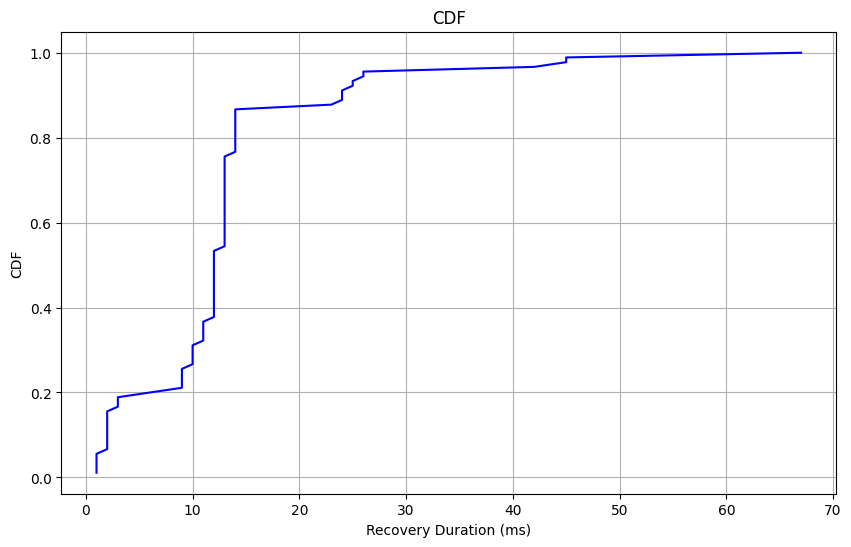

In [4]:
with open("recovery_time.txt", "r") as file:
    data = [int(line.split()[2]) for line in file.readlines()]

# Convert durations to milliseconds
data_ms = np.array(data)

# Sort the durations
data_ms_sorted = np.sort(data_ms)

# Calculate the cumulative probabilities
cdf = np.arange(1, len(data_ms_sorted) + 1) / len(data_ms_sorted)

# Plot the CDF
plt.figure(figsize=(10, 6))
plt.plot(data_ms_sorted, cdf,  linestyle='-', color='b')
plt.xlabel('Recovery Duration (ms)')
plt.ylabel('CDF')
plt.title('CDF')
plt.grid(True)
plt.show()
